In [28]:
import os, sys, pickle
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
from random import randint
from helper_models.autoencoder import read_n_images, generate_img_from_folder, get_input_shape, get_num_examples, plot_history, get_images, bgr2rgb, plot_reconstruction
DATA_DIR = '../data'

In [3]:
def loadModel(configName):
    path = './autoencoderTemps/'+configName+'/'
    modelPath = path + 'model'
    historyPath = path +'history.pickle'
    
    model = tf.keras.models.load_model(modelPath)
    with open(historyPath, 'rb') as f:
        history = pickle.load(f)
        
    return (model,history)

In [19]:
def showHistory(history):
    loss = history['loss']
    val_loss = history['val_loss']
    mse = history['mean_squared_error']
    val_mse = history['val_mean_squared_error']
    plt.plot(loss)
    plt.plot(val_loss)
    plt.show()
    plt.plot(mse)
    plt.plot(val_mse)
    plt.show()
    

In [45]:
def evaluateModel(model):
    # load data and run evalutation
    BATCH_SIZE_TEST = 32
    NUM_SAMPLES_TEST = get_num_examples(DATA_DIR, 'test')
    STEPS_TEST = ceil(NUM_SAMPLES_TEST/BATCH_SIZE_TEST)
    results =model.evaluate_generator(generate_img_from_folder(DATA_DIR, 'test', BATCH_SIZE_TEST),steps=STEPS_TEST)
    print('test loss ',results[0])
    print('test mse ', results[1])
    decoded_imgs = model.predict_generator(generate_img_from_folder(DATA_DIR, 'test', BATCH_SIZE_TEST),steps=1)
    return decoded_imgs

def showImages(images):
    num_images = 5
    idxs = [randint(0, 31) for i in range(num_images)]
    plot_reconstruction(images, DATA_DIR, 'test', idxs)


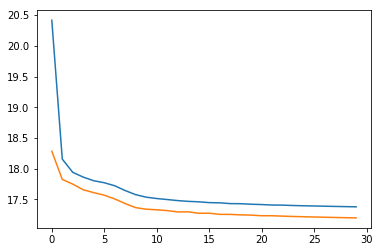

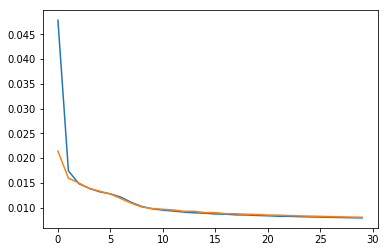

test loss  17.06421964308795
test mse  0.007662419


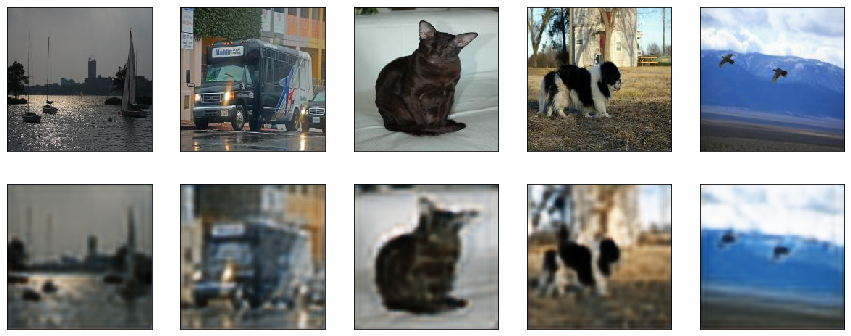

In [43]:
(model,history)=loadModel('config1')
showHistory(history)
decoded_images = evaluateModel(model)
showImages(decoded_images)

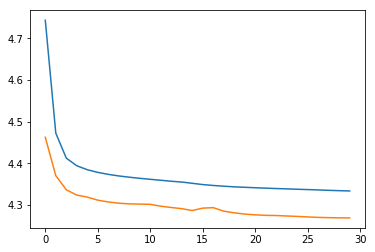

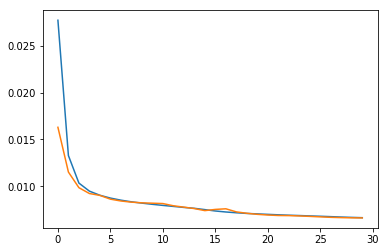

test loss  16.95016075583065
test mse  0.0063522747


IndexError: index 32 is out of bounds for axis 0 with size 32

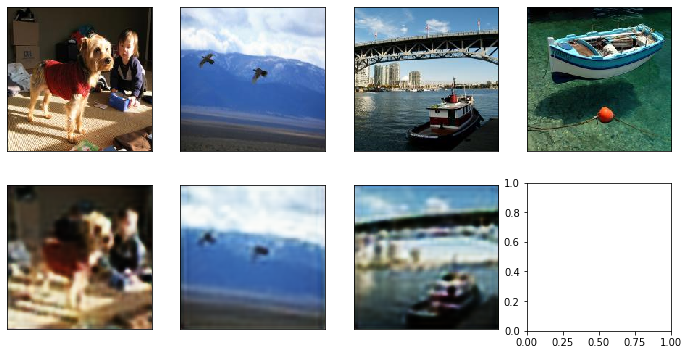

In [44]:
(model,history)=loadModel('config2')
showHistory(history)
decoded_images = evaluateModel(model)
showImages(decoded_images)

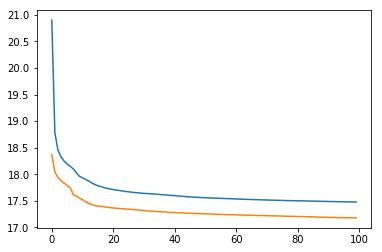

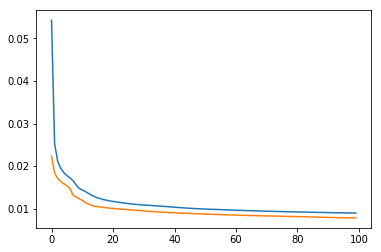

test loss  17.04378055123722
test mse  0.0074807894


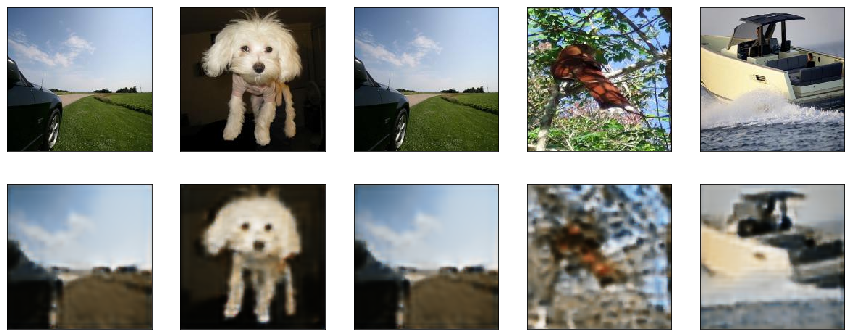

In [46]:
(model,history)=loadModel('config3')
showHistory(history)
decoded_images = evaluateModel(model)
showImages(decoded_images)

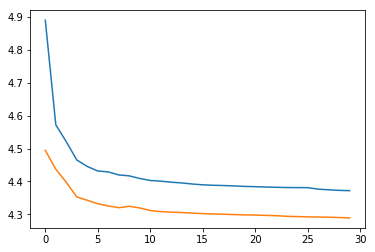

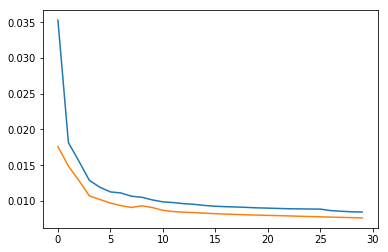

test loss  17.025106822743137
test mse  0.0072717904


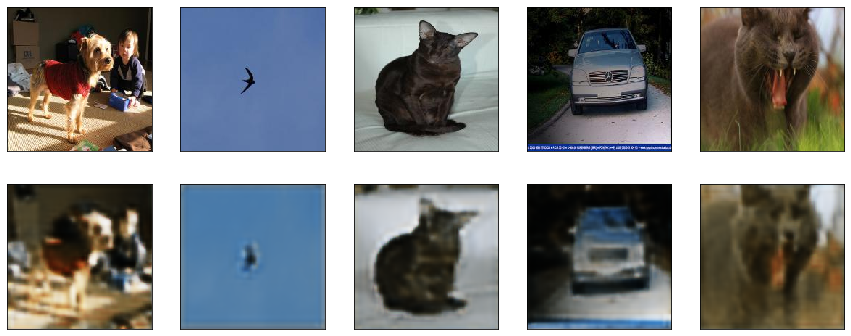

In [47]:
(model,history)=loadModel('config4')
showHistory(history)
decoded_images = evaluateModel(model)
showImages(decoded_images)

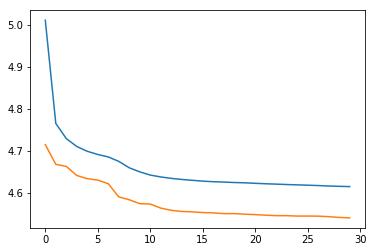

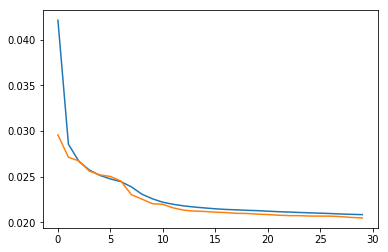

test loss  18.048883213716394
test mse  0.020325994


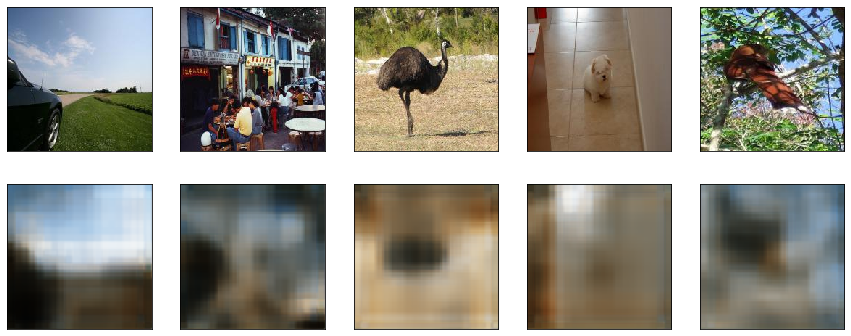

In [49]:
(model,history)=loadModel('config5')
showHistory(history)
decoded_images = evaluateModel(model)
showImages(decoded_images)

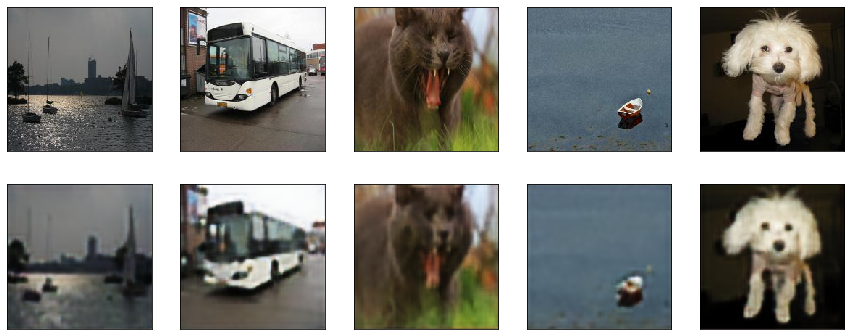

In [61]:
showImages(decoded_images)

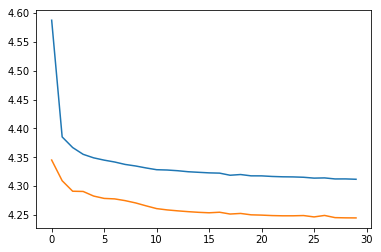

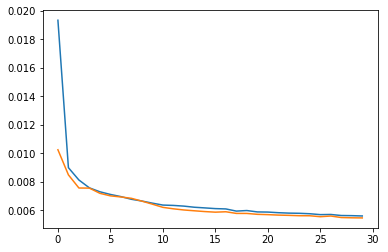

test loss  16.854099610272577
test mse  0.0052198875


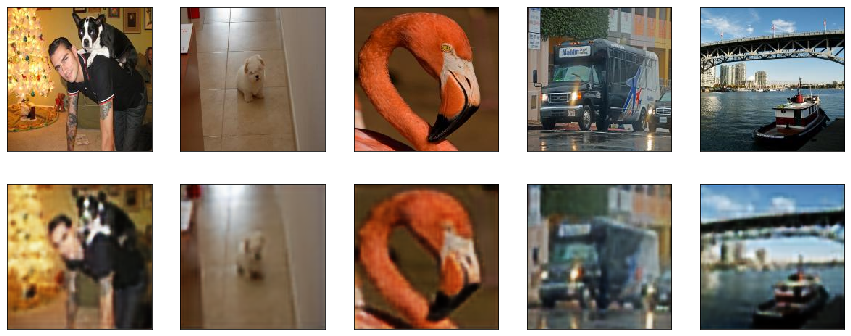

In [50]:
(model,history)=loadModel('config6')
showHistory(history)
decoded_images = evaluateModel(model)
showImages(decoded_images)